In [ ]:
import pandas as pd
from sklearn.datasets import load_digits
df= load_digits()
print(df)

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]]), 'target': array([0, 1, 2, ..., 8, 9, 8]), 'frame': None, 'feature_names': ['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 'pixel_0_4', 'pixel_0_5', 'pixel_0_6', 'pixel_0_7', 'pixel_1_0', 'pixel_1_1', 'pixel_1_2', 'pixel_1_3', 'pixel_1_4', 'pixel_1_5', 'pixel_1_6', 'pixel_1_7', 'pixel_2_0', 'pixel_2_1', 'pixel_2_2', 'pixel_2_3', 'pixel_2_4', 'pixel_2_5', 'pixel_2_6', 'pixel_2_7', 'pixel_3_0', 'pixel_3_1', 'pixel_3_2', 'pixel_3_3', 'pixel_3_4', 'pixel_3_5', 'pixel_3_6', 'pixel_3_7', 'pixel_4_0', 'pixel_4_1', 'pixel_4_2', 'pixel_4_3', 'pixel_4_4', 'pixel_4_5', 'pixel_4_6', 'pixel_4_7', 'pixel_5_0', 'pixel_5_1', 'pixel_5_2', 'pixel_5_3', 'pixel_5_4', 'pixel_5_5', 'pixel_5_6', 'pixel_5_7', 'pixel_6_0', '

APPLY **PREPROCESSING StandardScalere**



In [ ]:
import pandas as pd
dic=pd.DataFrame(df['data'],columns=df['feature_names'])
X=dic
y=df['target']

In [ ]:
from sklearn.preprocessing import StandardScaler 
model1=StandardScaler()
X_scaled=model1.fit_transform(X)
print(X_scaled)

[[ 0.         -0.33501649 -0.04308102 ... -1.14664746 -0.5056698
  -0.19600752]
 [ 0.         -0.33501649 -1.09493684 ...  0.54856067 -0.5056698
  -0.19600752]
 [ 0.         -0.33501649 -1.09493684 ...  1.56568555  1.6951369
  -0.19600752]
 ...
 [ 0.         -0.33501649 -0.88456568 ... -0.12952258 -0.5056698
  -0.19600752]
 [ 0.         -0.33501649 -0.67419451 ...  0.8876023  -0.5056698
  -0.19600752]
 [ 0.         -0.33501649  1.00877481 ...  0.8876023  -0.26113572
  -0.19600752]]


 **APPLY PCA**


In [ ]:
from sklearn.decomposition import PCA
pca=PCA(0.67)
X_pca=pca.fit_transform(X)
print("post pca shape",X_pca.shape)
print("pre pca shape",X.shape)

post pca shape (1797, 8)
pre pca shape (1797, 64)


In [ ]:
pca.explained_variance_ratio_


array([0.14890594, 0.13618771, 0.11794594, 0.08409979, 0.05782415,
       0.0491691 , 0.04315987, 0.03661373])

In [ ]:
pca.n_components_

8

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=8)
logistic=LogisticRegression()
logistic.fit(X_train,y_train)
print(logistic.score(X_test,y_test))

0.9666666666666667


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
X_train_pca,X_test_pca,y_train_pca,y_test_pca=train_test_split(X_pca,y,test_size=0.2,random_state=9)
logistic1=LogisticRegression()
logistic1.fit(X_train_pca,y_train_pca)
print(logistic1.score(X_test_pca,y_test_pca))

0.9083333333333333


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
pca1=PCA(n_components=3)
X_pca1=pca1.fit_transform(X)
print(X_pca1.shape)


(1797, 3)


In [ ]:
print(X_pca1)

print(pca1.explained_variance_ratio_)

[[ -1.2594671   21.27488283  -9.46305578]
 [  7.95761372 -20.76869687   4.43951599]
 [  6.99192218  -9.95598701   2.95855599]
 ...
 [ 10.80128176  -6.9602542    5.59954892]
 [ -4.87209478  12.42395898 -10.17082797]
 [ -0.344393     6.365546    10.77369378]]
[0.14890594 0.13618771 0.11794594]


In [ ]:
X_train_pca1,X_test_pca1,y_train_pca1,y_test_pca1=train_test_split(X_pca1,y,test_size=0.2,random_state=8)
logistic2=LogisticRegression()
logistic2.fit(X_train_pca1,y_train_pca1)
print(logistic2.score(X_test_pca1,y_test_pca1))

0.675


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


**APPLY** (a) LogisticRegression
    (b) SVM
    (c) KNN
    (d) DecisionTree
    (e) RandomForest**

(a) LogisticRegression

In [ ]:
X=df['data']
y=df['target']
print(X)
print('-----------------------------')
print(y)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
-----------------------------
[0 1 2 ... 8 9 8]


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.8,random_state=9)


In [ ]:
from sklearn.linear_model import LogisticRegression 
model1=LogisticRegression()
model1.fit(X,y)
a=model1.predict(X_test)
print(a)

[1 1 7 ... 8 0 5]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


(b) SVM

In [ ]:
from sklearn.svm import SVC
model2=SVC(kernel='poly')
model2.fit(X_train,y_train)


SVC(kernel='poly')

In [ ]:
b=model2.predict(X_test)
print(b)

[1 1 7 ... 8 0 5]


c) KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model3=KNeighborsClassifier(n_neighbors=3)
model3.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
c=model3.predict(X_test)
print(c)

[1 1 7 ... 8 0 5]


(d) DecisionTree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model4=DecisionTreeClassifier()
model4.fit(X_train,y_train)


DecisionTreeClassifier()

In [ ]:
d=model4.predict(X_test)
print(d)

[2 1 7 ... 8 0 5]


(e) RandomForest

In [ ]:
from sklearn.ensemble import RandomForestClassifier 
model5=RandomForestClassifier()  
model5.fit(X_train,y_train)
e=model5.predict(X_test)
print(e)


[1 1 7 ... 8 0 5]


Find accuracy of all above algorithm and finds which provides best accuracy

In [ ]:
print("Logistic regression accuracy",model1.score(X_test,y_test))
print("SVM Accuracy",model2.score(X_test,y_test))
print("KNN Accuracy",model3.score(X_test,y_test))
print("DecisionTree Accuracy",model4.score(X_test,y_test))
print("RandomTree Accuracy",model5.score(X_test,y_test))

Logistic regression accuracy 1.0
SVM Accuracy 0.9791376912378303
KNN Accuracy 0.9666203059805285
DecisionTree Accuracy 0.7273991655076495
RandomTree Accuracy 0.9541029207232267


LOGISTIC REGRESSION HAS THE HIGHEST ACCURACY

Find confusion matrix of all above algorithms and show it by heatmap of seaborn library. 


(a) LogisticRegression

In [ ]:
from sklearn.metrics import confusion_matrix
cm1=confusion_matrix(y_test,a)
print(cm1)

[[143   0   0   0   0   0   0   0   0   0]
 [  0 139   0   0   0   0   0   0   0   0]
 [  0   0 127   0   0   0   0   0   0   0]
 [  0   0   0 148   0   0   0   0   0   0]
 [  0   0   0   0 143   0   0   0   0   0]
 [  0   0   0   0   0 150   0   0   0   0]
 [  0   0   0   0   0   0 148   0   0   0]
 [  0   0   0   0   0   0   0 146   0   0]
 [  0   0   0   0   0   0   0   0 141   0]
 [  0   0   0   0   0   0   0   0   0 153]]


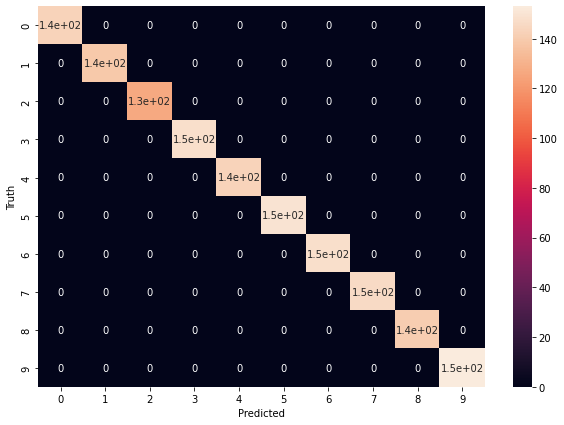

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
import seaborn as sns
sns.heatmap(cm1,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()


(b) SVM

In [ ]:

cm2=confusion_matrix(y_test,b)
print(cm2)


[[141   0   0   0   1   0   1   0   0   0]
 [  0 138   0   0   0   0   0   0   1   0]
 [  0   1 126   0   0   0   0   0   0   0]
 [  0   0   1 144   0   0   0   2   1   0]
 [  0   0   0   0 143   0   0   0   0   0]
 [  0   0   0   0   0 148   0   0   0   2]
 [  0   0   0   0   0   0 148   0   0   0]
 [  0   0   0   0   0   0   0 144   1   1]
 [  0   1   1   0   1   2   0   1 135   0]
 [  0   0   0   4   0   1   0   5   2 141]]


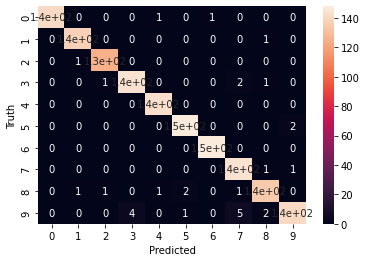

In [ ]:
sns.heatmap(cm2,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()


(c)KNN

In [ ]:
cm3=confusion_matrix(y_test,c)
print(cm3)


[[142   0   0   0   1   0   0   0   0   0]
 [  0 138   0   0   1   0   0   0   0   0]
 [  1   1 124   0   0   0   0   1   0   0]
 [  0   0   0 143   0   1   0   1   1   2]
 [  0   0   0   0 142   0   0   0   1   0]
 [  0   0   0   2   0 143   1   0   0   4]
 [  0   1   0   0   0   0 147   0   0   0]
 [  0   0   1   0   0   0   0 145   0   0]
 [  0   8   0   1   0   1   0   1 129   1]
 [  2   2   0   2   1   4   0   2   3 137]]


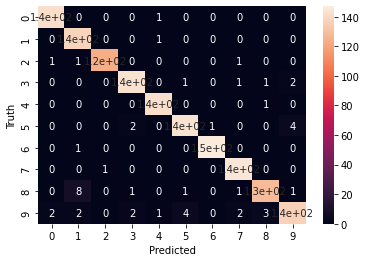

In [ ]:
sns.heatmap(cm3,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()


(d) DecisionTree

In [ ]:
cm4=confusion_matrix(y_test,d)
print(cm4)

[[121   1   0   0   7   1   0   0   3  10]
 [  0  78   9   0   3   0   4   7  30   8]
 [  1   8 107   1   0   0   1   0   6   3]
 [  1   3  36  88   0   1   0   3  11   5]
 [  2   7   0   0 118   6   1   2   6   1]
 [  2   9   1   0   9 106   7   0  11   5]
 [  0  11   1   0   5   5 118   0   5   3]
 [  0   3   2   0   9   3   0 121   6   2]
 [  0  11   9   7   3   5   3  10  87   6]
 [  2  19   3   1   3   3   5   9   6 102]]


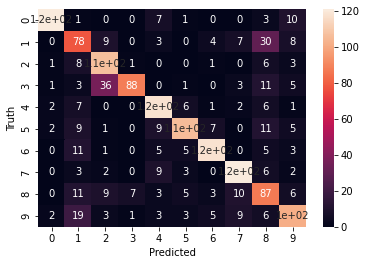

In [ ]:
sns.heatmap(cm4,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()


(e) RandomForest

In [ ]:
cm5=confusion_matrix(y_test,e)
print(cm5)

[[142   0   0   0   1   0   0   0   0   0]
 [  0 135   0   0   0   0   0   0   1   3]
 [  1   0 125   0   0   0   0   0   1   0]
 [  0   0   0 137   0   1   0   3   4   3]
 [  0   0   0   0 141   0   0   2   0   0]
 [  0   1   0   1   1 142   0   0   1   4]
 [  1   1   0   0   2   0 144   0   0   0]
 [  0   0   0   0   3   1   0 140   2   0]
 [  0   6   0   1   1   2   0   1 130   0]
 [  0   2   0   5   1   5   0   8   2 130]]


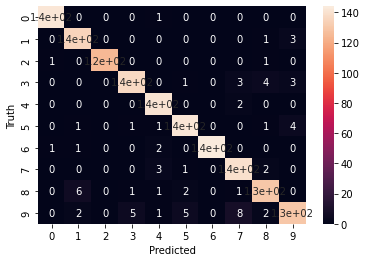

In [ ]:
sns.heatmap(cm5,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()
